In [3]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from utils.pose_extractor import PoseExtractor

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12

print("라이브러리 로드 완료!")

라이브러리 로드 완료!


In [4]:
extractor = PoseExtractor(target_fps=10, confidence_threshold=0.7)

# 비디오 경로 (본인 비디오 경로로 수정)
video_path = "../data/test_videos/walk4.mp4"

# 포즈 데이터 추출
print("포즈 데이터 추출 중...")
result = extractor.process_video(video_path, verbose=True)

# 기본 정보 출력
print(f"\n=== 추출된 데이터 정보 ===")
print(f"총 프레임 수: {len(result['landmarks'])}")
print(f"비디오 길이: {result['timestamps'][-1]:.1f}초")
print(f"포즈 감지율: {result['processing_stats']['pose_detection_rate']:.1f}%")


포즈 데이터 추출 중...
Video Validation Starting...
File: walk4.mp4
Size: 19.2 MB


I0000 00:00:1758150823.806209  427446 gl_context.cc:369] GL version: 2.1 (2.1 INTEL-18.8.5), renderer: Intel(R) UHD Graphics 630
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1758150823.998613  427890 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Duration: 10.7s (322 frames)
Resolution: 1600x1000
FPS: 30.0
Video validation successful!
Processing video: walk4.mp4
Original FPS: 30.00
Target FPS: 10
Frame skip interval: 3
Total frames: 322


W0000 00:00:1758150824.032690  427887 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758150824.053813  427891 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


Processed 100 frames...

Processing complete!
Frames processed: 108
Pose detection rate: 100.0%
Actual processing FPS: 10.06

=== 추출된 데이터 정보 ===
총 프레임 수: 108
비디오 길이: 10.7초
포즈 감지율: 100.0%


In [5]:
def extract_landmark_coordinates(landmarks_data, timestamps, landmark_name):
    """특정 랜드마크의 좌표를 시계열 데이터로 추출"""
    x_coords = []
    y_coords = []
    confidences = []
    valid_timestamps = []
    
    for i, frame_landmarks in enumerate(landmarks_data):
        if frame_landmarks and landmark_name in frame_landmarks:
            x, y, conf = frame_landmarks[landmark_name]
            if x is not None and y is not None:
                x_coords.append(x)
                y_coords.append(y)
                confidences.append(conf)
                valid_timestamps.append(timestamps[i])
            else:
                x_coords.append(np.nan)
                y_coords.append(np.nan)
                confidences.append(conf)
                valid_timestamps.append(timestamps[i])
        else:
            x_coords.append(np.nan)
            y_coords.append(np.nan)
            confidences.append(0.0)
            valid_timestamps.append(timestamps[i])
    
    return np.array(valid_timestamps), np.array(x_coords), np.array(y_coords), np.array(confidences)

# 주요 랜드마크 데이터 추출
landmarks_to_analyze = ['LEFT_HIP', 'RIGHT_HIP', 'LEFT_HEEL', 'RIGHT_HEEL', 
                       'LEFT_ANKLE', 'RIGHT_ANKLE', 'LEFT_FOOT_INDEX', 'RIGHT_FOOT_INDEX']

landmark_data = {}
for landmark in landmarks_to_analyze:
    t, x, y, conf = extract_landmark_coordinates(result['landmarks'], result['timestamps'], landmark)
    landmark_data[landmark] = {
        'timestamps': t,
        'x': x,
        'y': y,
        'confidence': conf
    }

print("데이터 구조화 완료!")



데이터 구조화 완료!


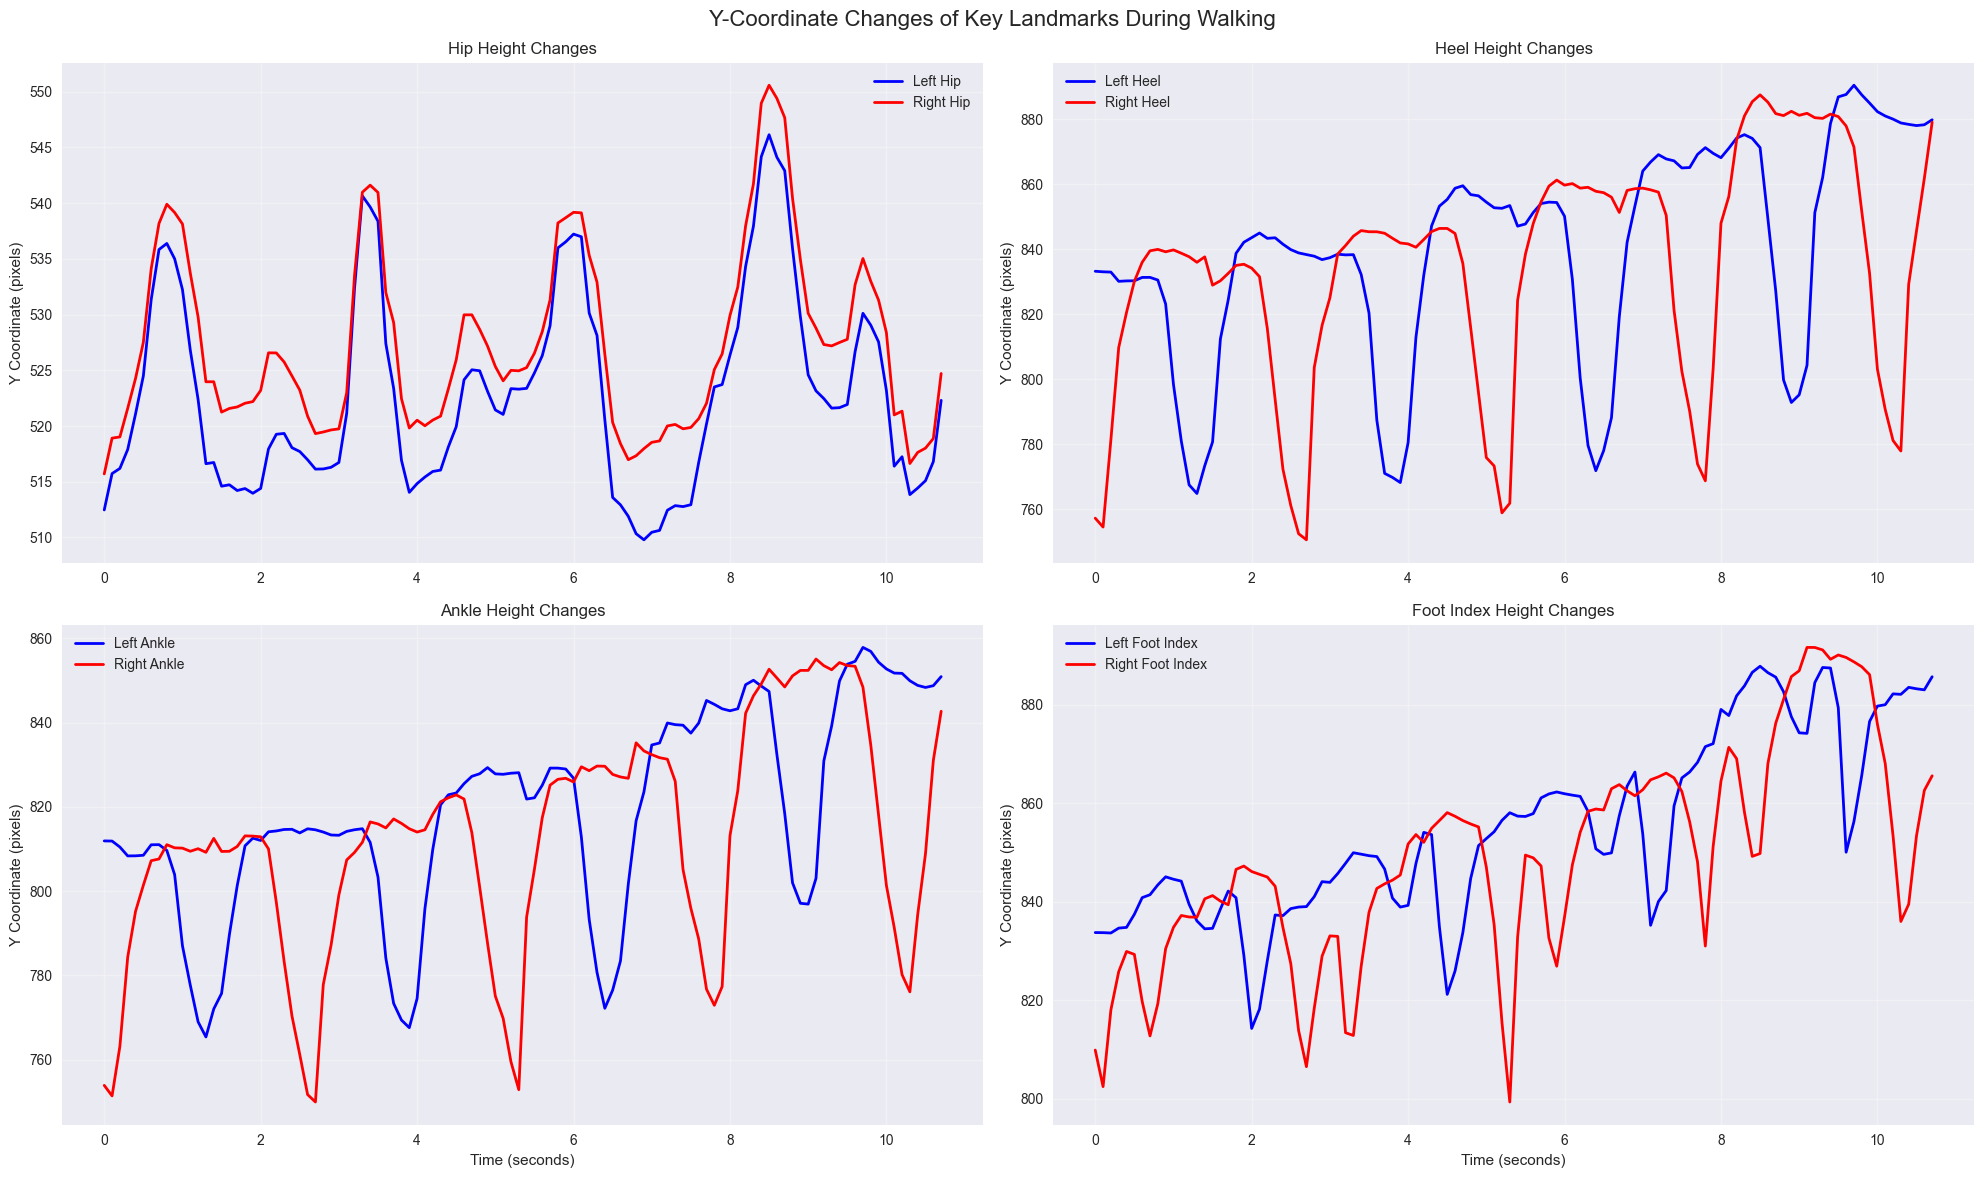

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Y-Coordinate Changes of Key Landmarks During Walking', fontsize=16)

# Hip trajectory
axes[0,0].plot(landmark_data['LEFT_HIP']['timestamps'], landmark_data['LEFT_HIP']['y'], 
               'b-', label='Left Hip', linewidth=2)
axes[0,0].plot(landmark_data['RIGHT_HIP']['timestamps'], landmark_data['RIGHT_HIP']['y'], 
               'r-', label='Right Hip', linewidth=2)
axes[0,0].set_title('Hip Height Changes')
axes[0,0].set_ylabel('Y Coordinate (pixels)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Heel trajectory
axes[0,1].plot(landmark_data['LEFT_HEEL']['timestamps'], landmark_data['LEFT_HEEL']['y'], 
               'b-', label='Left Heel', linewidth=2)
axes[0,1].plot(landmark_data['RIGHT_HEEL']['timestamps'], landmark_data['RIGHT_HEEL']['y'], 
               'r-', label='Right Heel', linewidth=2)
axes[0,1].set_title('Heel Height Changes')
axes[0,1].set_ylabel('Y Coordinate (pixels)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Ankle trajectory
axes[1,0].plot(landmark_data['LEFT_ANKLE']['timestamps'], landmark_data['LEFT_ANKLE']['y'], 
               'b-', label='Left Ankle', linewidth=2)
axes[1,0].plot(landmark_data['RIGHT_ANKLE']['timestamps'], landmark_data['RIGHT_ANKLE']['y'], 
               'r-', label='Right Ankle', linewidth=2)
axes[1,0].set_title('Ankle Height Changes')
axes[1,0].set_xlabel('Time (seconds)')
axes[1,0].set_ylabel('Y Coordinate (pixels)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Foot Index trajectory
axes[1,1].plot(landmark_data['LEFT_FOOT_INDEX']['timestamps'], landmark_data['LEFT_FOOT_INDEX']['y'], 
               'b-', label='Left Foot Index', linewidth=2)
axes[1,1].plot(landmark_data['RIGHT_FOOT_INDEX']['timestamps'], landmark_data['RIGHT_FOOT_INDEX']['y'], 
               'r-', label='Right Foot Index', linewidth=2)
axes[1,1].set_title('Foot Index Height Changes')
axes[1,1].set_xlabel('Time (seconds)')
axes[1,1].set_ylabel('Y Coordinate (pixels)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

NameError: name 'left_hip_heel_distance' is not defined

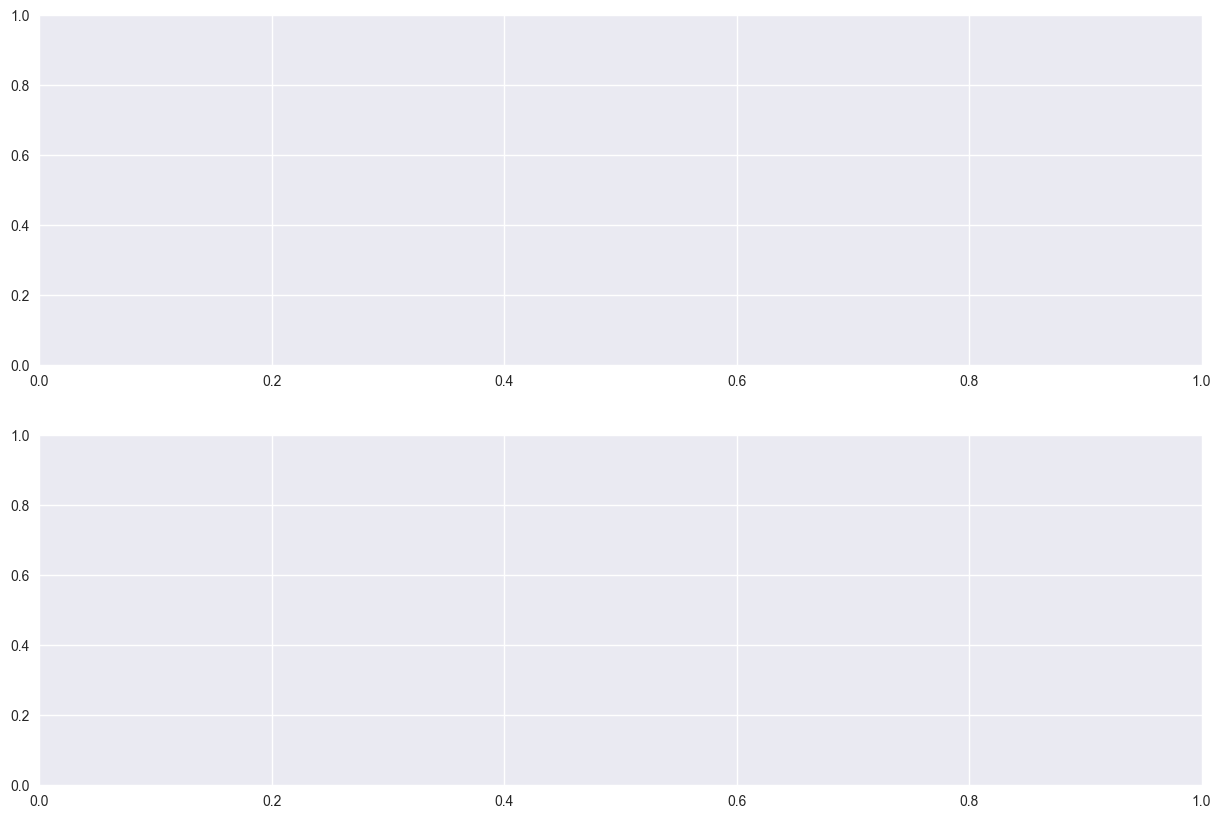

In [8]:
# Hip-Foot 거리 시각화
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Hip-Heel 거리
axes[0].plot(landmark_data['LEFT_HIP']['timestamps'], left_hip_heel_distance, 
             'b-', label='Left Hip-Heel Distance', linewidth=2)
axes[0].plot(landmark_data['RIGHT_HIP']['timestamps'], right_hip_heel_distance, 
             'r-', label='Right Hip-Heel Distance', linewidth=2)
axes[0].set_title('Hip-Heel Distance Changes (Basic Signal for Footstep Detection)', fontsize=14)
axes[0].set_ylabel('Distance (pixels)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Hip-Foot Index 거리
axes[1].plot(landmark_data['LEFT_HIP']['timestamps'], left_hip_foot_distance, 
             'b-', label='Left Hip-Foot Distance', linewidth=2)
axes[1].plot(landmark_data['RIGHT_HIP']['timestamps'], right_hip_foot_distance, 
             'r-', label='Right Hip-Foot Distance', linewidth=2)
axes[1].set_title('Hip-Foot Index Distance Changes', fontsize=14)
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Distance (pixels)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

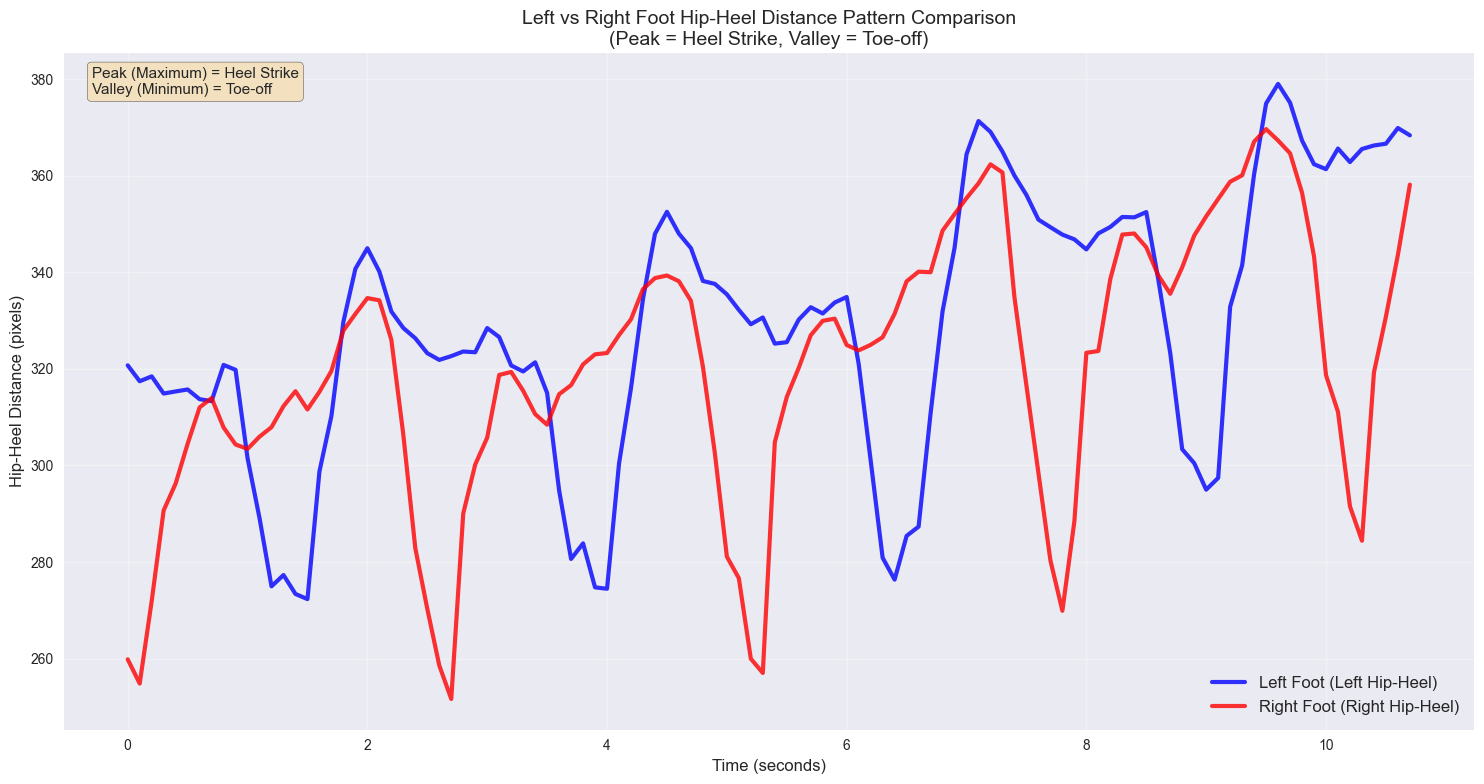

In [ ]:
# 6-1. 좌우 발의 보행 패턴 비교
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# 좌우 Hip-Heel 거리를 같은 그래프에 표시
ax.plot(landmark_data['LEFT_HIP']['timestamps'], left_hip_heel_distance, 
        'b-', label='Left Foot (Left Hip-Heel)', linewidth=3, alpha=0.8)
ax.plot(landmark_data['RIGHT_HIP']['timestamps'], right_hip_heel_distance, 
        'r-', label='Right Foot (Right Hip-Heel)', linewidth=3, alpha=0.8)

ax.set_title('Left vs Right Foot Hip-Heel Distance Pattern Comparison\n(Peak = Heel Strike, Valley = Toe-off)', fontsize=14)
ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Hip-Heel Distance (pixels)', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# 패턴 설명 텍스트 추가
ax.text(0.02, 0.98, 'Peak (Maximum) = Heel Strike\nValley (Minimum) = Toe-off', 
        transform=ax.transAxes, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
print("=== 보행 패턴 통계 분석 ===\n")

# NaN 값 제거하여 유효한 데이터만 분석
left_valid = left_hip_heel_distance[~np.isnan(left_hip_heel_distance)]
right_valid = right_hip_heel_distance[~np.isnan(right_hip_heel_distance)]

print(f"왼발 Hip-Heel 거리:")
print(f"  평균: {np.mean(left_valid):.1f} pixels")
print(f"  표준편차: {np.std(left_valid):.1f} pixels")
print(f"  최소값: {np.min(left_valid):.1f} pixels")
print(f"  최대값: {np.max(left_valid):.1f} pixels")

print(f"\n오른발 Hip-Heel 거리:")
print(f"  평균: {np.mean(right_valid):.1f} pixels")
print(f"  표준편차: {np.std(right_valid):.1f} pixels")
print(f"  최소값: {np.min(right_valid):.1f} pixels")
print(f"  최대값: {np.max(right_valid):.1f} pixels")

# 좌우 대칭성 분석
left_range = np.max(left_valid) - np.min(left_valid)
right_range = np.max(right_valid) - np.min(right_valid)
symmetry_ratio = min(left_range, right_range) / max(left_range, right_range)

print(f"\n보행 대칭성:")
print(f"  왼발 변화 범위: {left_range:.1f} pixels")
print(f"  오른발 변화 범위: {right_range:.1f} pixels")
print(f"  대칭성 비율: {symmetry_ratio:.3f} (1.0에 가까울수록 대칭)")

=== 보행 패턴 통계 분석 ===

왼발 Hip-Heel 거리:
  평균: 328.9 pixels
  표준편차: 27.1 pixels
  최소값: 272.3 pixels
  최대값: 379.0 pixels

오른발 Hip-Heel 거리:
  평균: 320.2 pixels
  표준편차: 27.5 pixels
  최소값: 251.7 pixels
  최대값: 369.6 pixels

보행 대칭성:
  왼발 변화 범위: 106.7 pixels
  오른발 변화 범위: 118.0 pixels
  대칭성 비율: 0.904 (1.0에 가까울수록 대칭)


In [ ]:
print("=== Signal Processing 준비 ===\n")

# 결과 데이터를 딕셔너리로 정리
gait_analysis_result = {
    'timestamps': landmark_data['LEFT_HIP']['timestamps'],
    'left_hip_heel_distance': left_hip_heel_distance,
    'right_hip_heel_distance': right_hip_heel_distance,
    'left_hip_foot_distance': left_hip_foot_distance,
    'right_hip_foot_distance': right_hip_foot_distance,
    'landmark_data': landmark_data,
    'video_info': result['video_info'],
    'processing_stats': result['processing_stats']
}

print(f"다음 단계에서 사용할 데이터:")
print(f"- 타임스탬프: {len(gait_analysis_result['timestamps'])}개")
print(f"- 좌우 Hip-Heel 거리 신호 준비완료")
print(f"- Signal Processor에서 사용할 준비 완료!")

=== Signal Processing 준비 ===

다음 단계에서 사용할 데이터:
- 타임스탬프: 108개
- 좌우 Hip-Heel 거리 신호 준비완료
- Signal Processor에서 사용할 준비 완료!


In [ ]:
print("=== 보행패턴 분석 완료 ===\n")
print("✅ 완료된 분석:")
print("  - 주요 랜드마크 궤적 시각화")
print("  - Hip-Foot 거리 계산")
print("  - 좌우 발 보행 패턴 비교")
print("  - 보행 통계 분석")
print("  - Signal Processing 데이터 준비")

print(f"\n📊 핵심 결과:")
print(f"  - 포즈 감지 성공률: {result['processing_stats']['pose_detection_rate']:.1f}%")
print(f"  - 분석된 보행 시간: {result['timestamps'][-1]:.1f}초")
print(f"  - 보행 대칭성: {symmetry_ratio:.3f}")

=== 보행패턴 분석 완료 ===

✅ 완료된 분석:
  - 주요 랜드마크 궤적 시각화
  - Hip-Foot 거리 계산
  - 좌우 발 보행 패턴 비교
  - 보행 통계 분석
  - Signal Processing 데이터 준비

📊 핵심 결과:


NameError: name 'result' is not defined